<a href="https://colab.research.google.com/github/salazar-io/DevF_projects/blob/main/Proyecto_DevF_deportistas_mejor_pagados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
! pip install pycountry
import pycountry
import folium 
from folium import plugins


import numpy as np
from PIL import Image


import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
print("Listo!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=18ca940af0edbcc0fea9122e67ee00cba5a9098b5af80b154a52bd4589fa6272
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Listo!


In [2]:
url = "https://github.com/devfmx/master-data-ai/blob/main/9.%20Proyecto/Forbes%20Richest%20Atheletes%20(Forbes%20Richest%20Athletes%201990-2020).csv?raw=true"
df = pd.read_csv(url)
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [25]:
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [26]:
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df1['Sport'] = df1['Sport'].str.upper()
df1.head()

# df is the original dataframe while df1 is a copy where the Date has been set as an index column

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


# Los atletas mejor pagados en 2020

In [5]:
data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Atletas mejor pagados entre 1990 y 2020

In [6]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient(cmap='Reds')  

,Name,Sport,Nationality,earnings ($ million)
year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000


# Atletas con mayor ingreso y máximo número de apariciones en la lista Forbes

In [7]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


In [8]:
# Top Paid Athlete for Each Year
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')

In [9]:

import plotly.graph_objs as go
from plotly import tools
trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earnings ($ million)'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()


# Pais que produce los máximos generadores de ingreso en deporte

In [10]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# ¿Cuanto ingresan los mejores atletas cada año?

In [11]:
trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#  Análisis de los 10 atletas mejores pagados cada año entre 1990 y 2020.

In [12]:
df['Sport'] = df['Sport'].str.upper() # Converting the text to uppercase
max_sport = df['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# País que más ingresos tiene en deportes

In [13]:
max_sport = df['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Atletas que aparecen más frecuentemente en la lista 

In [14]:
s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')

,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
LeBron James,13
Michael Schumacher,13


# ¿Dónde se encuentran las mujeres?

In [15]:
# People who have appeared once on the list.
names = df['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
29,30,Monica Seles,USA,10,12,TENNIS,1992,8.500000


# Analizando a los 3 mejores pagados de todos los tiempos

In [16]:
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds')  

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000


# Analizando los ingresos de Tiger Woods a lo largo de los años

In [17]:
def earnings_plot(dataframe,athlete,image_path,opacity):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = df1[df1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          opacity= opacity,
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [18]:
image_path = "/content/images/Tiger-woods.jpg"
earnings_plot(df1,'Tiger Woods',image_path,opacity=0.3)

FileNotFoundError: ignored

# Analizando los ingresos de Floyd Mayweather a lo largo de los años



In [ ]:
image_path = "/content/images/floyd_m.jpg_219914347-4158831139"
earnings_plot(df1,'Floyd Mayweather',image_path,opacity=0.2)

# Analizando los ingresos de Lebron James a lo largo de los años


In [ ]:
image_path = "/content/images/lebron_james"
earnings_plot(df1,'LeBron James',image_path,opacity=0.2)

# 8. ¡Es tu momento de brillar🚀!

# Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [38]:
rank2010 = df1.loc[2010].set_index('Name')
rank2020= df1.loc[2020].set_index('Name')

In [39]:
ranks_up_down = pd.DataFrame(rank2010['Current Rank'].sub(rank2020['Current Rank']).dropna())
ranks_up_down = ranks_up_down.rename(columns={'Current Rank':'Rank Positions Up'})
ranks_up_down.head(11)

,Rank Positions Up
Name,
LeBron James,2.0
Roger Federer,5.0
Tiger Woods,-7.0


In [40]:

ranks_up_down[ranks_up_down['Rank Positions Up']>=2 ]

,Rank Positions Up
Name,
LeBron James,2.0
Roger Federer,5.0


### Solución 2

In [41]:

## otra opcion: aqui mostramos los jugadores que se encuentran en ambas fechas usando merge() 
ranks=rank2010.merge(rank2020, how='inner', left_index=True, right_index=True)
ranks=ranks[['Current Rank_x','Current Rank_y']].rename(columns={'Current Rank_x':'Rank 2010','Current Rank_y':'Rank 2020'})
ranks['ranks up']=(ranks['Rank 2010'].sub(ranks['Rank 2020'])>=2)

ranks=pd.DataFrame(ranks)
ranks


,Rank 2010,Rank 2020,ranks up
Name,,,
Tiger Woods,1,8,False
Roger Federer,6,1,True
LeBron James,7,5,True


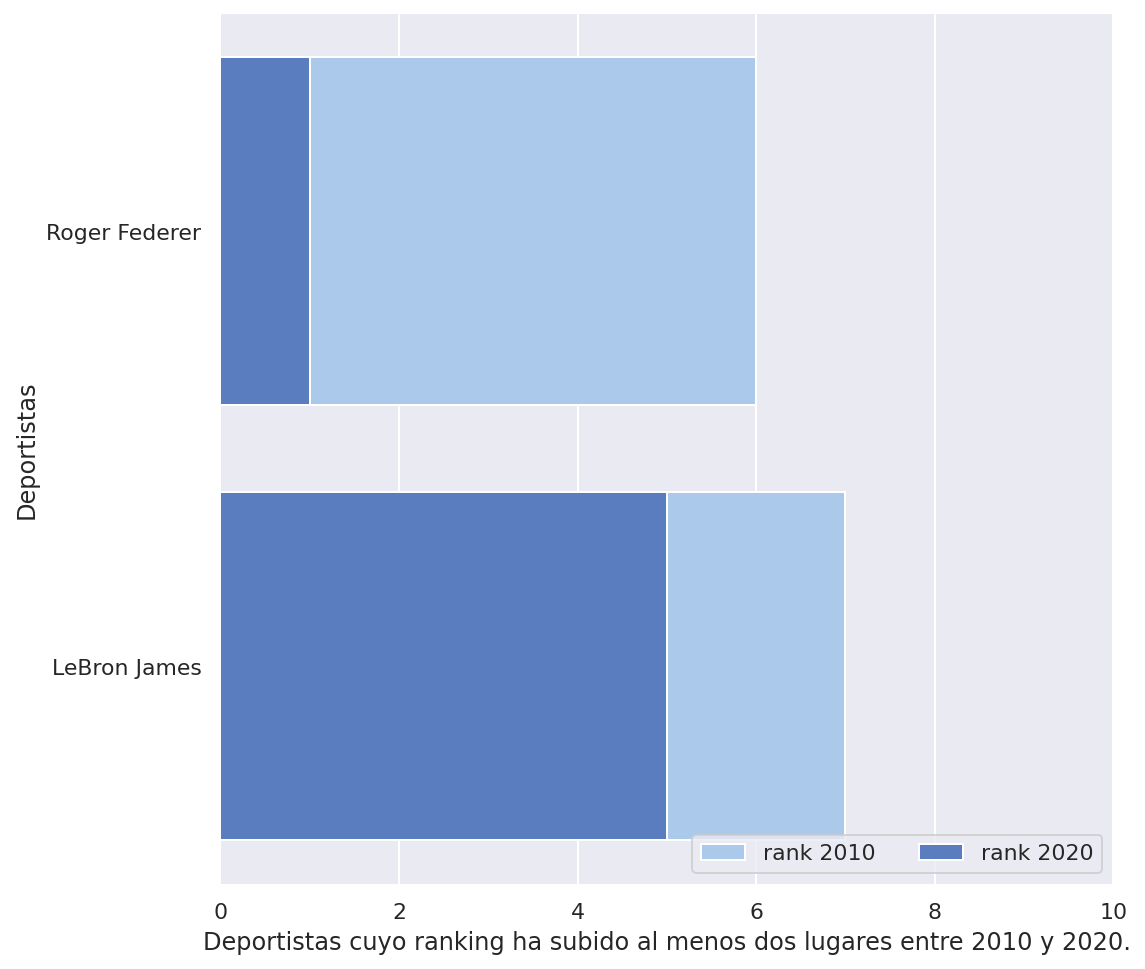

In [42]:
ranks = ranks.drop("Tiger Woods") # quitamos a tiger woods ya que el bajó 7 lugares entre 2010 y 2020

#usando seaborn para hacer un grafico de barras
f, ax = plt.subplots(figsize=(8, 8))

sns.set_color_codes("pastel")
sns.barplot(x='Rank 2010', y=ranks.index, data=ranks,
            label="rank 2010", color="b",dodge = True)

sns.set_color_codes("muted")
sns.barplot(x='Rank 2020', y=ranks.index, data=ranks,
            label="rank 2020", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="Deportistas",
       xlabel="Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.")
sns.despine(left=True, bottom=True)

# Atleta con el menor número de apariciones y mayores ganancias.

In [43]:
from collections import Counter

grouped = df1[ "earnings ($ million)"].groupby(df1["Name"])
print(grouped.size())
#comprobamos cuantos atletas obtuvimos, en este caso 82 con su respectivo total de apariciones en la lista y sus ingresos
#con group by obtenemos el registro de cada deportista por lo que se iterara cada elemento, obtenemos la suma de todos sus ingresos y comparamos veces que ha estado en la lista y los ingresos
nombres, times, earnings = [],[],[]
compara_apariciones = 1 #una aparicion
compara_ingreso = 0 #empezamos en cero dolares
el_chido = ""

Name
Aaron Rodgers       1
Aaron Rogers        1
Alain Prost         3
Alex Rodriguez      4
Andre Agassi        6
                   ..
Terrell Suggs       1
Tiger Woods        19
Tom Brady           1
Valentino Rossi     4
Wayne Gretzky       2
Name: earnings ($ million), Length: 82, dtype: int64


In [44]:

for name, group in grouped:
    apariciones = Counter(df1['Name']==name)[True]
    earning =group.sum()
    nombres.append(name)
    times.append(apariciones)
    earnings.append(earning)
    #print(name)
    #print(f"${earning:.2f}, veces: {apariciones}")
    if(apariciones <= compara_apariciones and earning > compara_ingreso ):
        el_chido = name
        compara_ingreso = apariciones
        compara_ingreso = earning 


a=pd.DataFrame({"Name": nombres,"earnings ($ million)":earnings,"Times in top":times}).set_index('Name')
a=a.sort_values(by=["Times in top"])
a.head(100)



,earnings ($ million),Times in top
Name,,
Aaron Rodgers,49.0,1
Eli Manning,39.9,1
Emmit Smith,16.5,1
Gary Sheffield,17.2,1
Novak Djokovic,55.8,1
...,...,...
Michael Schumacher,639.0,13
LeBron James,844.8,13
Kobe Bryant,601.1,14


In [45]:
resultado=df1.loc[lambda df: df['Name'] == el_chido, :] # obtener toda la fila filtrando por valor en una columna
resultado.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2018,Conor McGregor,Ireland,4,24,MMA,99.0


# Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

In [72]:
DF_not_ranks = df1.sort_values(by='Previous Year Rank', na_position='first')
DF_not_ranks['Previous Year Rank'].unique()

array([nan, '1', '10', '11', '12', '13', '14', '15', '17', '18', '19',
       '2', '20', '21', '22', '24', '26', '3', '30', '38', '4', '40', '5',
       '6', '7', '8', '9', '>10', '>100', '>14', '>20', '>30', '>40', '?',
       '??', 'none', 'not ranked'], dtype=object)

In [73]:
valid_ranks = ['1', '10', '11', '12', '13', '14', '15', '17', '18', '19',
       '2', '20', '21', '22', '24', '26', '3', '30', '38', '4', '40', '5',
       '6', '7', '8', '9', '>10', '>100', '>14', '>20', '>30', '>40']
       
resultado=DF_not_ranks.loc[lambda df: ~(df['Previous Year Rank'].isin(valid_ranks)), :] # obtener toda la fila filtrando por valor en una columna
resultado.head(50)


,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0
1990,Jack Nicklaus,USA,6,NaN,GOLF,8.6
1990,Greg Norman,Australia,7,NaN,GOLF,8.5
1990,Michael Jordan,USA,8,NaN,BASKETBALL,8.1
1990,Arnold Palmer,USA,8,NaN,GOLF,8.1


In [74]:
a=resultado[['Sport']].groupby(resultado['Nationality']).count()
a=a.reset_index()
a

,Nationality,Sport
0,Australia,1
1,Brazil,1
2,Canada,1
3,France,1
4,Germany,1
5,Russia,1
6,UK,1
7,USA,27


In [75]:
import plotly.express as px
fig = px.scatter(a, x=a.index, y="Sport",
	         size="Sport", color='Nationality',
                 hover_name="Nationality", size_max=60)
fig.show()

In [76]:
b=resultado[['Nationality']].groupby(resultado['Sport']).count().sort_values(by='Nationality')
b=b.reset_index()
b

,Sport,Nationality
0,BASEBALL,1
1,F1 MOTORSPORTS,1
2,HOCKEY,1
3,ICE HOCKEY,1
4,NASCAR,1
5,NFL,1
6,AUTO RACING,3
7,AMERICAN FOOTBALL,5
8,GOLF,5
9,BASKETBALL,7


In [77]:

fig = px.scatter(b, x=b.index, y="Nationality",
	         size="Nationality", color='Sport',
                 hover_name="Sport", size_max=60)
fig.show()

# País con mayor número de deportes con atletas en el dataset.

In [52]:
grupos =df1[["Name","Nationality","Sport"]].groupby("Nationality").nunique().sort_values(by="Name")
grupos = grupos.rename(columns = {'Name':'Athletes','Sport':'Number of Sports'})

In [53]:
fig = px.scatter(grupos,title="Paises y número de deportes con atletas en el dataset", x=grupos.index, y="Number of Sports",
	         size="Athletes", color=grupos.index,
                 hover_name=grupos.index, size_max=60)
fig.show()

# ¿Cuántos atletas por deporte tiene cada país?

In [54]:
agrupados=df1[["Name","Nationality","Sport"]].groupby("Nationality") #agrupando por nacionalidad para obtener grupos de pais con sus deportistas

pais, deporte, conteo_atletas = np.array([]), np.array([]), np.array([])

for nacionalidad,b in agrupados:
    c = b.groupby("Sport")["Name"].nunique() #agrupando por nombre para obtener el numero de deportistas por cada deporte en cada pais
    pais = np. concatenate( [pais,[nacionalidad]*c.count()] ) #pais * numero de deportes 
    conteo_atletas = np.concatenate( [conteo_atletas, c.tolist()] ) #atletas por cada deporte 
    deporte = np.concatenate( [deporte, c.index.tolist()] ) #nombre del deporte

conteo_atletas = conteo_atletas.astype(int)

In [55]:
DF_solucion = pd.DataFrame({"Nationality":pais,"Sport":deporte,"Number of athletes":conteo_atletas})
DF_solucion

,Nationality,Sport,Number of athletes
0,Argentina,SOCCER,1
1,Australia,GOLF,1
2,Austria,AUTO RACING,1
3,Brazil,AUTO RACING,1
4,Brazil,SOCCER,2
5,Canada,AUTO RACING,1
6,Canada,BOXING,1
7,Canada,HOCKEY,1
8,Canada,ICE HOCKEY,1
9,Dominican,BASEBALL,1


# Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [56]:
agrupados=df1[["earnings ($ million)","Nationality","Sport"]].groupby("Nationality") #agrupando por nacionalidad para obtener grupos de pais con sus deportistas

pais, deporte, mn, mx  =np.array([]), np.array([]), np.array([]), np.array([])


for nacionalidad,b in agrupados:
    
    mins = b.groupby("Sport")["earnings ($ million)"].min() #agrupando por nombre para obtener el numero de deportistas por cada deporte en cada pais
    maxs = b.groupby("Sport")["earnings ($ million)"].max()
    mn = np.concatenate( [mn, mins.to_list()] )
    mx = np.concatenate( [mx, maxs.to_list()] )
    pais = np.concatenate( [pais, [nacionalidad] * mins.count()] ) #pais * numero de deportes 
    deporte = np.concatenate( [deporte, mins.index.tolist()] ) #nombre del deporte

mm = mn.astype(int)
mx =mx.astype(int)


In [57]:
print(len(pais))

41


In [58]:
DF_solucion = pd.DataFrame( { "Nationality":pais, "Sport":deporte, "Min Earning": mn, "Max Earning": mx } )
DF_solucion

,Nationality,Sport,Min Earning,Max Earning
0,Argentina,SOCCER,32.3,127
1,Australia,GOLF,8.5,8
2,Austria,AUTO RACING,13.5,13
3,Brazil,AUTO RACING,10.0,22
4,Brazil,SOCCER,31.0,105
5,Canada,AUTO RACING,20.0,23
6,Canada,BOXING,10.2,10
7,Canada,HOCKEY,17.9,17
8,Canada,ICE HOCKEY,13.5,14
9,Dominican,BASEBALL,35.0,35


# Atleta con mayores ganancias por deporte por década

In [59]:
df_a = df1.reset_index()
df_a["decade"] = (df_a["year"]//10)*10 
df_a.head(5)

,year,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million),decade
0,1990,Mike Tyson,USA,1,NaN,BOXING,28.6,1990
1,1990,Buster Douglas,USA,2,NaN,BOXING,26.0,1990
2,1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0,1990
3,1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0,1990
4,1990,Alain Prost,France,5,NaN,AUTO RACING,9.0,1990


In [60]:

agrupados=df_a[["earnings ($ million)","Name","Sport","year","decade"]].groupby("decade") #agrupando por nacionalidad para obtener grupos de pais con sus deportistas

deporte, names, earnings  = np.array([]), np.array([]), np.array([])
decades= np.arange(1990,2001,10)


In [61]:
c= pd.DataFrame()

for decada,b in agrupados:   
    print(decada)
    maxs_name = b[["earnings ($ million)","Name","Sport"]].groupby("Sport").head(150) #devuelve data frames agrupando deportes por decada
    deportes = maxs_name["Sport"].unique() #nombres de cada deporte por decada

    for j in deportes: 
        a = df_a.loc[lambda df: (df['decade'] == decada) & (df["Sport"]== j), :] #registros de cada decada y deporte
        v = a[["earnings ($ million)","Sport","decade"]].max('columns'=="earnings ($ million)").to_frame().T #obteniendo el maximo mejor pagado
        frames=[v,c]    
        c = pd.concat(frames ) #concatenando cada data frame por decada

1990
2000
2010
2020


In [62]:
c.head(100)
print(c.shape)

(42, 3)


In [63]:
df2=df1.copy()
df2=df2.reset_index()
df2["decade"] = (df2["year"]//10)*10 
ddd = pd.merge(df2, c, on = ["earnings ($ million)","Sport","decade"], how = "inner")
ddd.head(100)

,year,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million),decade
0,1993,Shaquille O'Neal,USA,6,>40,NBA,15.2,1990
1,1995,Deion Sanders,USA,3,38,AMERICAN FOOTBALL / BASEBALL,22.5,1990
2,1995,Andre Agassi,USA,7,9,TENNIS,16.0,1990
3,1996,Mike Tyson,USA,1,2,BOXING,75.0,1990
4,1996,Emmit Smith,USA,5,not ranked,NFL,16.5,1990
5,1997,Michael Jordan,USA,1,2,BASKETBALL,78.3,1990
6,1997,Joe Sakic,Canada,9,none,HOCKEY,17.9,1990
7,1998,Michael Schumacher,Germany,2,NaN,F1 MOTORSPORTS,38.0,1990
8,1998,Sergei Federov,Russia,3,NaN,ICE HOCKEY,29.8,1990
9,1998,Dale Earnhardt,USA,5,NaN,NASCAR,24.1,1990


In [64]:
#df1.loc[lambda df: (df['Sport'] == "BOXING") & (df.index>2000), :]             #para comprobar consultando el data set original

In [65]:
import plotly.express as px

fig = px.bar(ddd, x="decade", y="earnings ($ million)", color="Sport", barmode="group", hover_data=["Sport","earnings ($ million)","Name"],title="Atleta con mayores ganancias por deporte por década")
fig.show()


# Ganancia total por cada deporte por cada año.

In [67]:
sprt_yr = df1.copy()
sprt_yr= sprt_yr.reset_index()
sprt_yr.columns

Index(['year', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'earnings ($ million)'],
      dtype='object')

In [ ]:
sprt_yr = sprt_yr.groupby(['year','Sport'])["earnings ($ million)"].sum().to_frame()
sprt_yr.style.background_gradient(axis=0, cmap ="Greens_r" , subset = "earnings ($ million)")

In [ ]:
# otra solucion
#sprt_yr = sprt_yr.groupby(['year','Sport']).agg({"earnings ($ million)": "sum"})
#sprt_yr

#Crea un tablero en Power BI que represente los aspectos más importantes del dataset, a tu gusto.